<a href="https://colab.research.google.com/github/Sravya106/CreditRiskPrediction/blob/main/CreditRisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [8]:
data = pd.read_csv("german_credit_data.csv")

In [9]:
data.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [11]:
df = data.drop(columns=['Unnamed: 0'], errors='ignore')

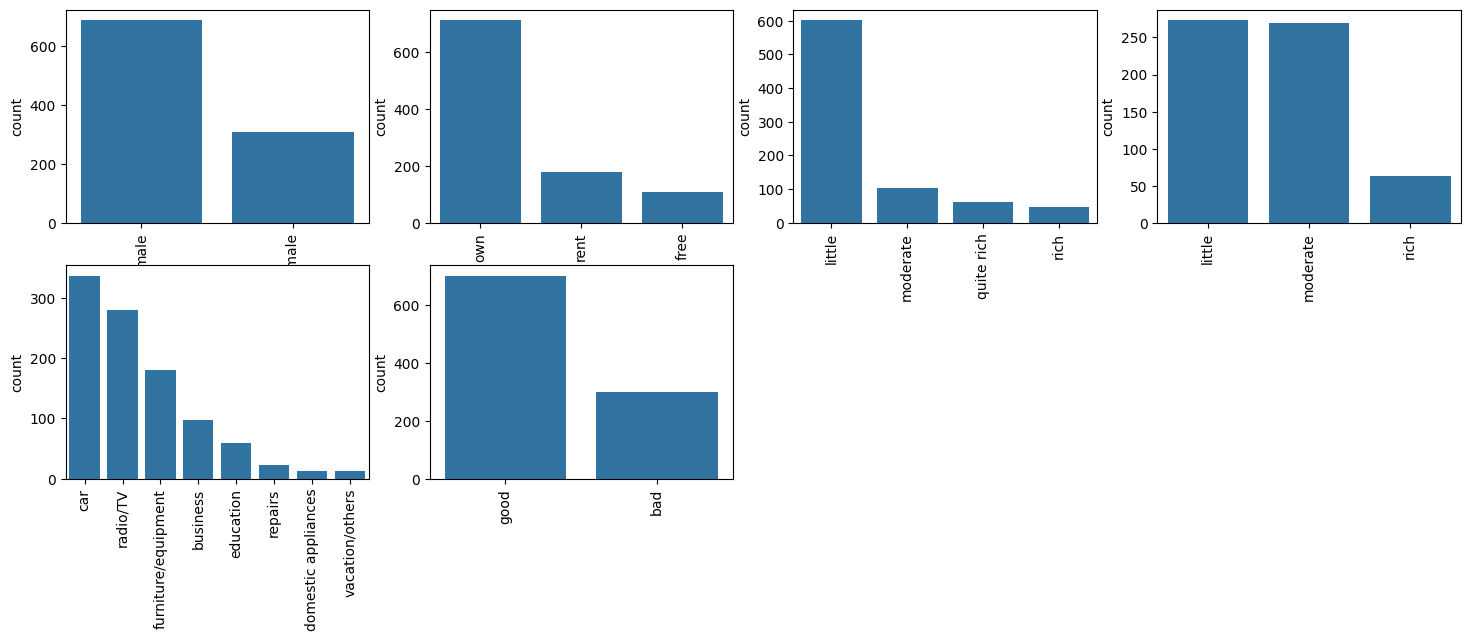

In [12]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1


In [13]:
df.replace("NA", np.nan, inplace=True)
df.fillna(method='ffill', inplace=True)

<ipython-input-13-d5baf051a312>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [14]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [15]:
X = df.drop('Risk', axis=1)
y = le.fit_transform(df['Risk'])

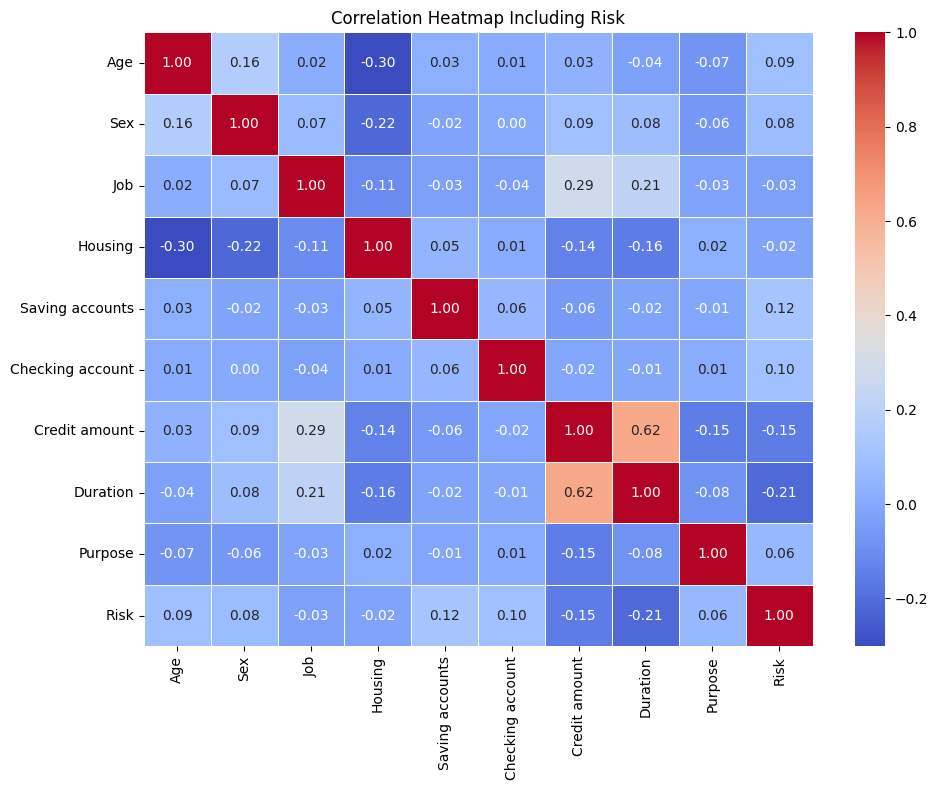

In [16]:
df['Risk'] = le.fit_transform(df['Risk'])
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap Including Risk")
plt.tight_layout()
plt.show()

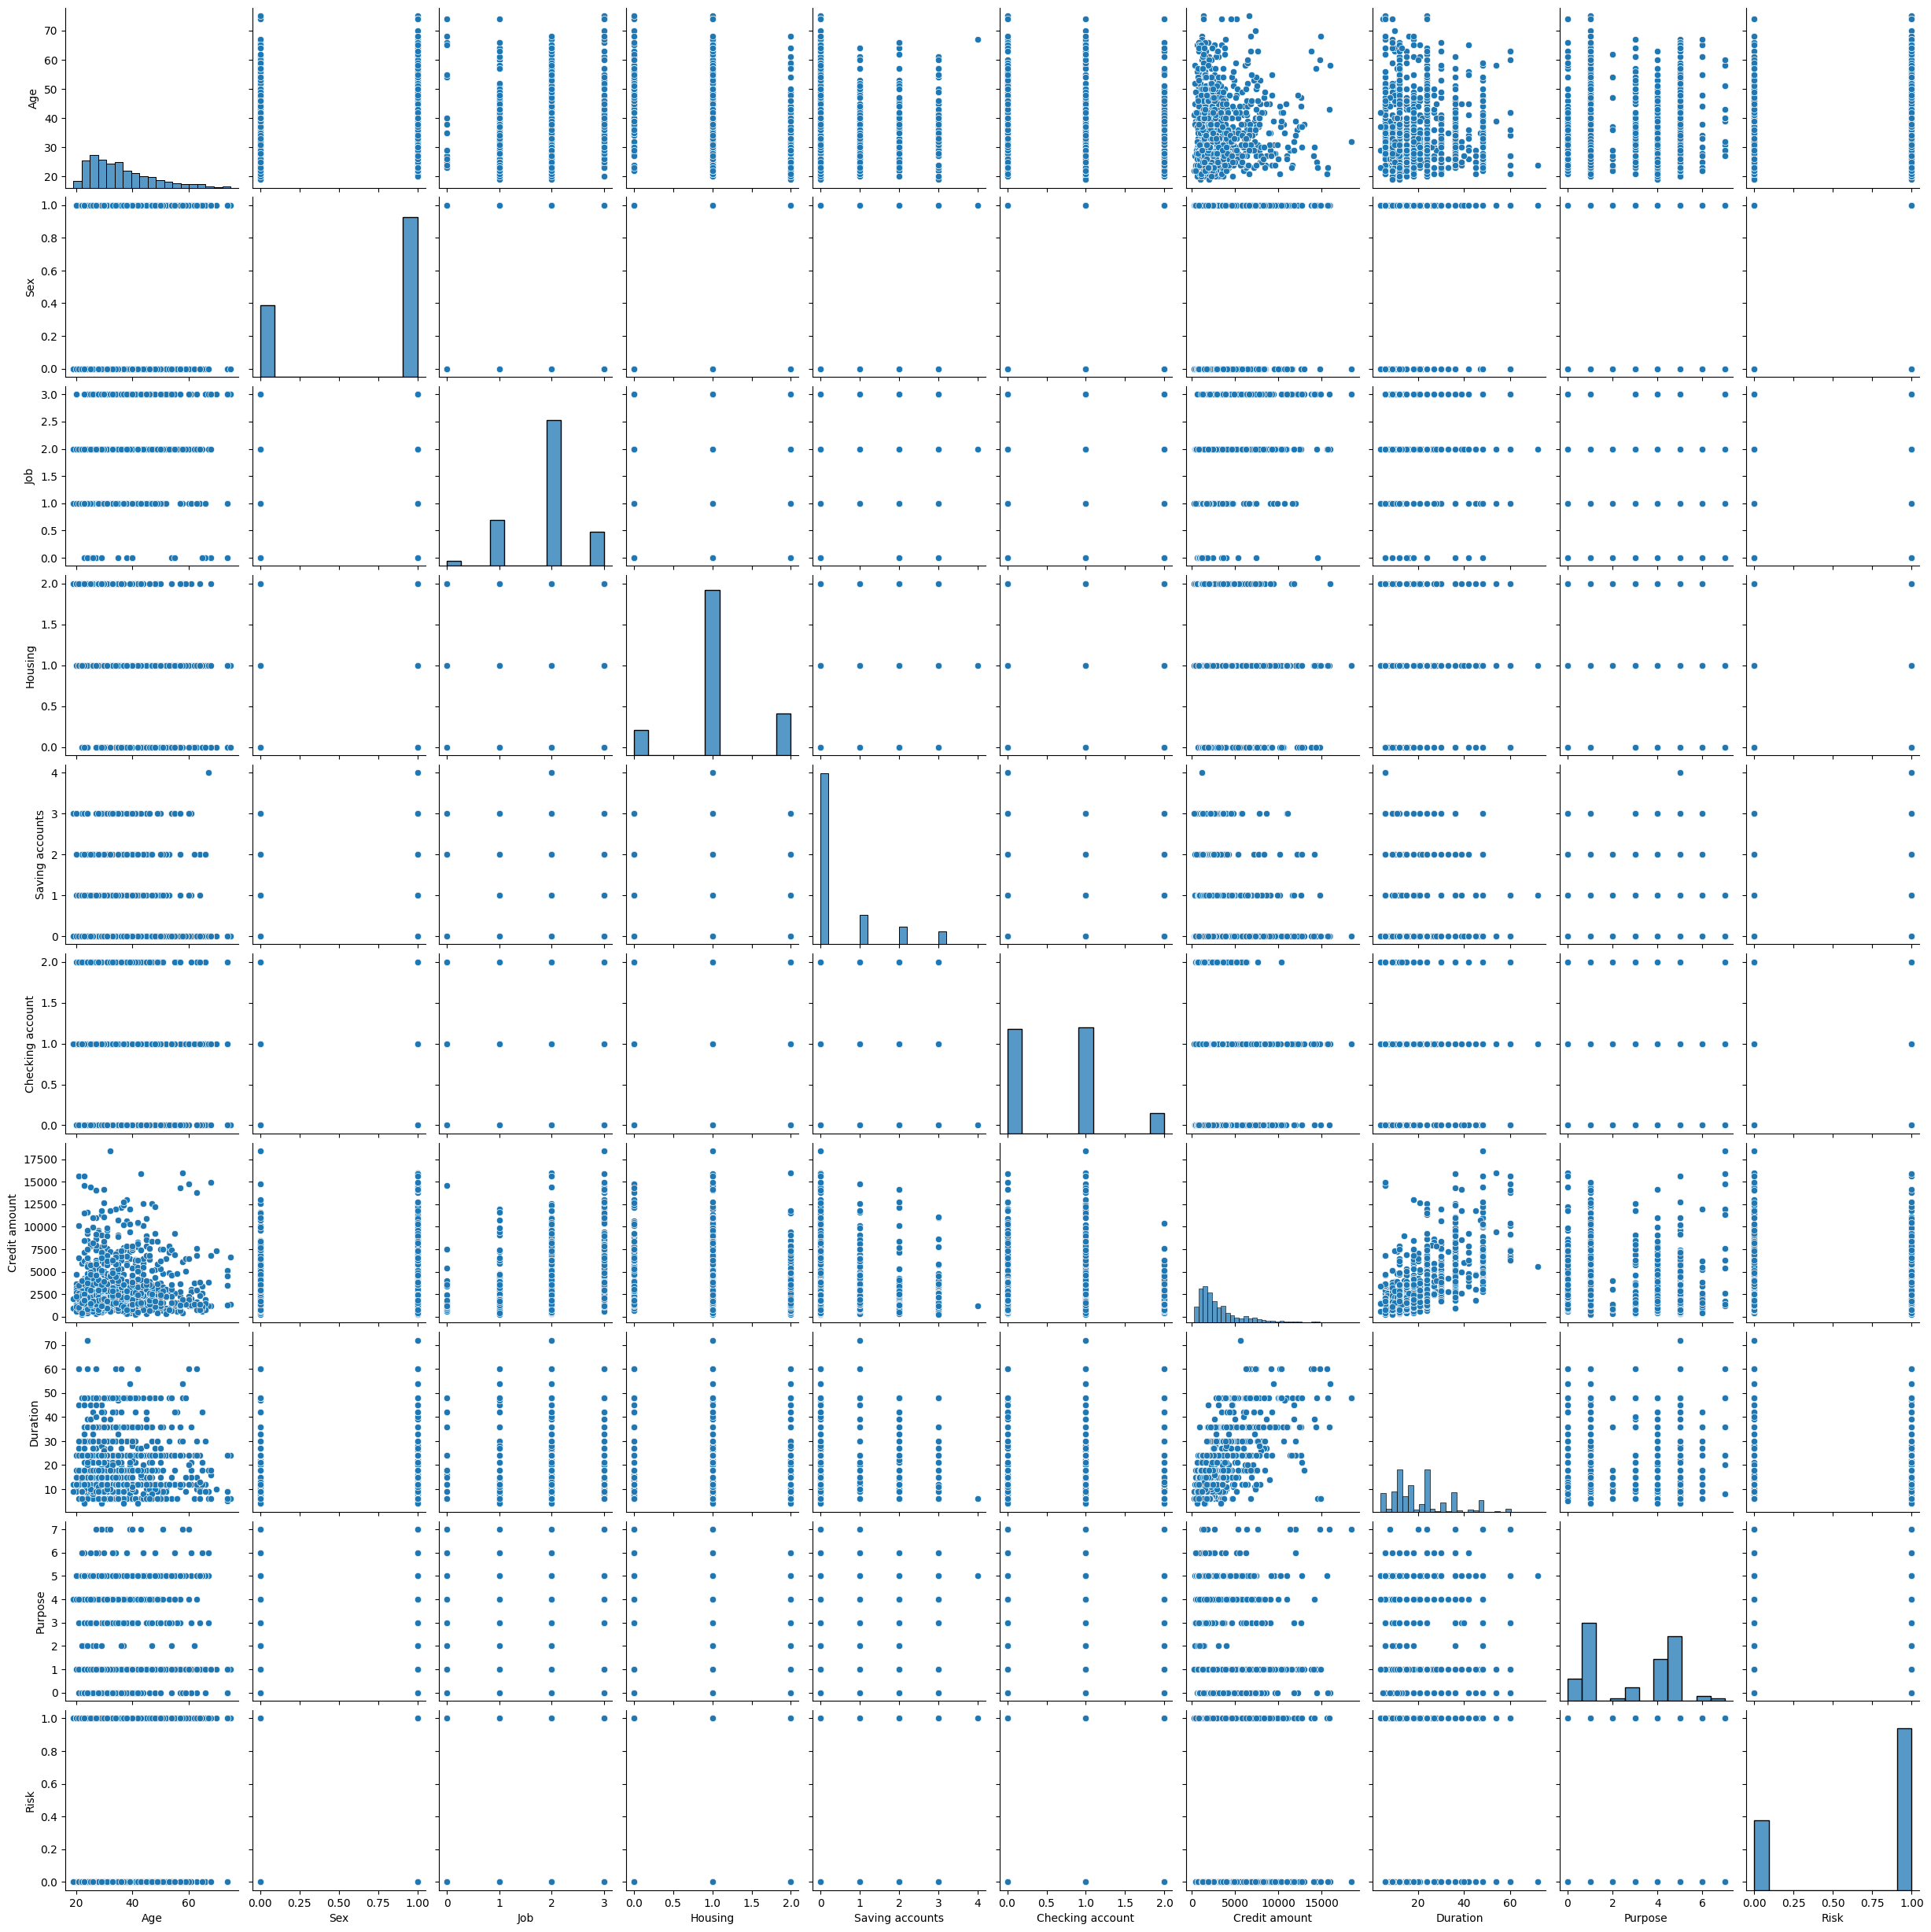

In [17]:
sns.pairplot(df)

In [18]:
X.drop(['Job', 'Housing', 'Purpose','Sex'], axis=1, inplace=True)


In [19]:
print(y)

[1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1
 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0
 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0
 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0
 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 

In [20]:
X.head()

,Age,Saving accounts,Checking account,Credit amount,Duration
0,67,4,0,1169,6
1,22,0,1,5951,48
2,49,0,1,2096,12
3,45,0,0,7882,42
4,53,0,0,4870,24


In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


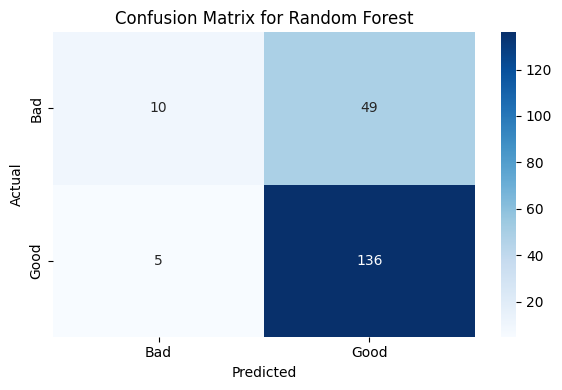

Best Hyperparameters from GridSearchCV: {'class_weight': None, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

=== Best Random Forest Classification Report ===
Accuracy: 0.73
Precision: 0.7351351351351352
Recall: 0.9645390070921985
F1 Score: 0.8343558282208589


In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [10],
    'min_samples_leaf': [2],
    'max_features': ['sqrt'],
    'class_weight': [None]
}
rf_model = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

rf_y_pred = best_rf_model.predict(X_test)

rf_cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"])
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
accuracy_rf = accuracy_score(y_test, rf_y_pred)
precision_rf = precision_score(y_test, rf_y_pred)
recall_rf = recall_score(y_test, rf_y_pred)
f1_rf = f1_score(y_test, rf_y_pred)

print("Best Hyperparameters from GridSearchCV:", grid_search.best_params_)
print("\n=== Best Random Forest Classification Report ===")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)


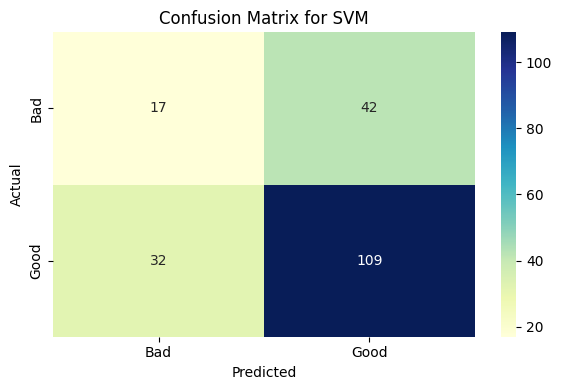

In [24]:
svm_model = SVC(kernel='sigmoid', random_state=42)
svm_model.fit(X_train, y_train)

svm_y_pred = svm_model.predict(X_test)


svm_cm = confusion_matrix(y_test, svm_y_pred)

accuracy_svm = accuracy_score(y_test, svm_y_pred)
precision_svm = precision_score(y_test, svm_y_pred)
recall_svm = recall_score(y_test, svm_y_pred)
f1_svm = f1_score(y_test, svm_y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"])
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

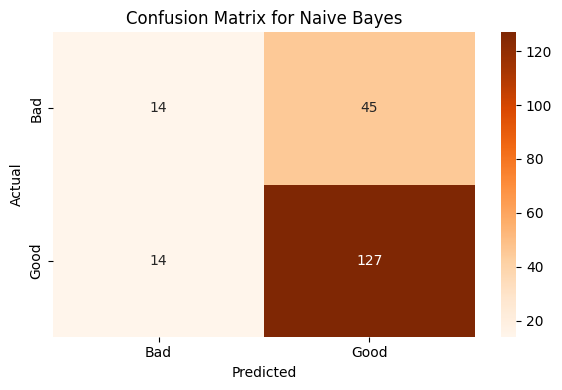

In [25]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

nb_y_pred = nb_model.predict(X_test)

nb_cm = confusion_matrix(y_test, nb_y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Oranges", xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"])
plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

accuracy_nb = accuracy_score(y_test, nb_y_pred)
precision_nb = precision_score(y_test, nb_y_pred)
recall_nb = recall_score(y_test, nb_y_pred)
f1_nb = f1_score(y_test, nb_y_pred)

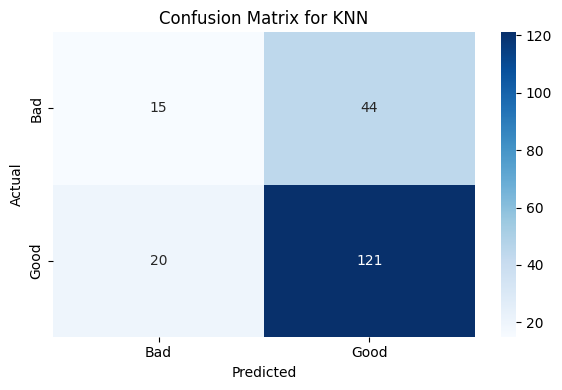

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

knn_cm = confusion_matrix(y_test, knn_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"])
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

accuracy_knn = accuracy_score(y_test, knn_y_pred)
precision_knn = precision_score(y_test, knn_y_pred)
recall_knn = recall_score(y_test, knn_y_pred)
f1_knn = f1_score(y_test, knn_y_pred)


<Figure size 1000x600 with 0 Axes>

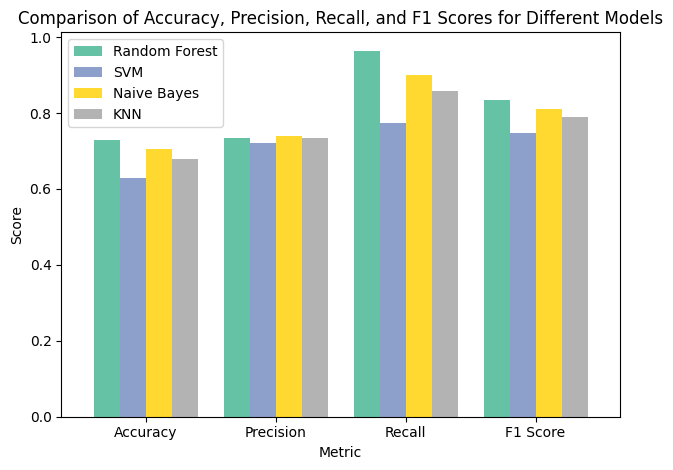

In [27]:
scores = {
    "Random Forest": [accuracy_rf, precision_rf, recall_rf, f1_rf],
    "SVM": [accuracy_svm, precision_svm, recall_svm, f1_svm],
    "Naive Bayes": [accuracy_nb, precision_nb, recall_nb, f1_nb],
    "KNN": [accuracy_knn, precision_knn, recall_knn, f1_knn]
}

metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
scores_df = pd.DataFrame(scores, index=metrics)

plt.figure(figsize=(10, 6))
scores_df.plot(kind='bar', colormap='Set2', width=0.8)
plt.title("Comparison of Accuracy, Precision, Recall, and F1 Scores for Different Models")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [28]:
print(scores_df.to_markdown())

|           |   Random Forest |      SVM |   Naive Bayes |      KNN |
|:----------|----------------:|---------:|--------------:|---------:|
| Accuracy  |        0.73     | 0.63     |      0.705    | 0.68     |
| Precision |        0.735135 | 0.721854 |      0.738372 | 0.733333 |
| Recall    |        0.964539 | 0.77305  |      0.900709 | 0.858156 |
| F1 Score  |        0.834356 | 0.746575 |      0.811502 | 0.79085  |


In [29]:
import joblib

joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

In [30]:
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

In [31]:
from google.colab import files

# Download the model file
files.download('rf_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>